# 영화 리뷰 분류

In [29]:
from keras.models import Sequential # 모델 생성
from keras.layers import Dense # 레이어 추가
from keras import optimizers # 최적화 함수 객체

In [2]:
from keras.datasets import imdb

In [34]:
# 가장 자주 등장하는 단어 10,000개를 사용
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [35]:
print(train_data[0]) # 리뷰에 포함되어 있는 단어들의 인덱스
print(train_label[0]) # 부정: 0 긍정: 1

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [36]:
# 리뷰가 25,000개, 단어는 10,000개
train_data.shape

(25000,)

In [37]:
max([max(sequence) for sequence in train_data])

9999

## 리뷰 데이터 복구

숫자로 전처리 되어있는 데이터를 다시 영어로 복구

In [6]:
word_index = imdb.get_word_index()
rev_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([rev_word_index.get(i-3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 데이터 준비

1. 각 리뷰의 길이가 같은 길이가 되도록 리스트에 패딩을 추가
2. 정수 텐서로 변환
3. `One-hot Encoding`을 통해 0과 1로 이루어져 있는 10000차원(num_words)의 벡터로 변환

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train.shape, x_test.shape)

(25000, 10000) (25000, 10000)


In [42]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망 모델 생성

In [45]:
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(10000,))) # 10000 x 16 개의 weights
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## 훈련 검증

In [49]:
x_validate = x_train[:10000]
partial_x_train = x_train[10000:]

y_validate = y_train[:10000]
partial_y_train = y_train[10000:]

In [50]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validate, y_validate))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5490 - accuracy: 0.7533 - val_loss: 0.4318 - val_accuracy: 0.8713
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3461 - accuracy: 0.8972 - val_loss: 0.3387 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2519 - accuracy: 0.9237 - val_loss: 0.2952 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1917 - accuracy: 0.9445 - val_loss: 0.2787 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1583 - accuracy: 0.9507 - val_loss: 0.2775 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1285 - accuracy: 0.9620 - val_loss: 0.2987 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1066 - accuracy: 0.9703 - val_loss: 0.3034 - val_accuracy: 0.8834
Epoch 8/20
30

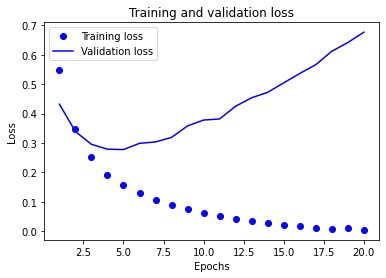

In [51]:
import matplotlib.pyplot as plt


history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss") #"bo" 는 파란색 점
plt.plot(epochs, val_loss, 'b', label="Validation loss") # 'b'는 파란색 실선
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.savefig("IMDB_history.png")

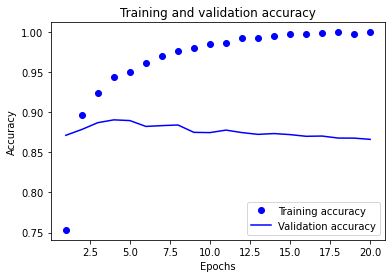

In [52]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("IMDB_accuracy.png")

In [59]:
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(10000,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print("Loss: {} Accuracy: {}".format(results[0], results[1]))

Epoch 1/4
49/49 [==============================] - 0s 10ms/step - loss: 0.4668 - accuracy: 0.8167
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2648 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2045 - accuracy: 0.9266
Epoch 4/4
782/782 [==============================] - 1s 763us/step - loss: 0.2900 - accuracy: 0.8851
Loss: 0.2900218665599823 Accuracy: 0.8850799798965454


In [60]:
model.predict(x_test)

array([[0.1638794 ],
       [0.9992299 ],
       [0.8470736 ],
       ...,
       [0.08593273],
       [0.06143245],
       [0.6703905 ]], dtype=float32)